# Stage 3 Analysis

In [1]:
import os
from os.path import join
import sys
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import QDYN

In [2]:
%matplotlib inline

In [3]:
%reload_ext autoreload
%autoreload 2

In [4]:
from notebook_utils import get_stage1_table, get_stage3_table, get_Q_table,\
oct_overview, show_oct_summary_table, write_quality_table

In [5]:
get_stage1_table = QDYN.memoize.memoize(get_stage1_table)
get_stage1_table.load('stage1_table.cache')
get_stage3_table = QDYN.memoize.memoize(get_stage3_table)
get_stage3_table.load('stage3_table.cache')

## T = 200 ns (RWA) ##

* Concurrence and Loss -- PE

/data/goerz/jobs/ConstrainedTransmon/venv/lib/python2.7/site-packages/matplotlib/tri/triangulation.py:110: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  self._neighbors)
/data/goerz/jobs/ConstrainedTransmon/venv/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


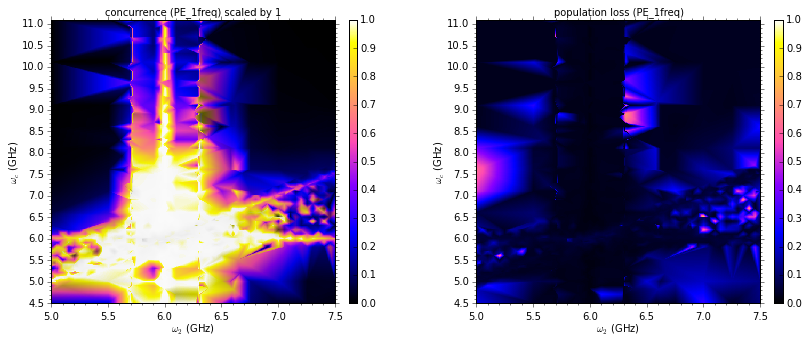

* Quality

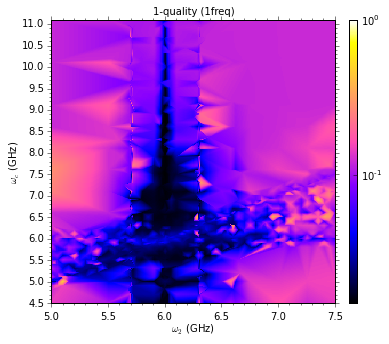

* Weyl Chamber

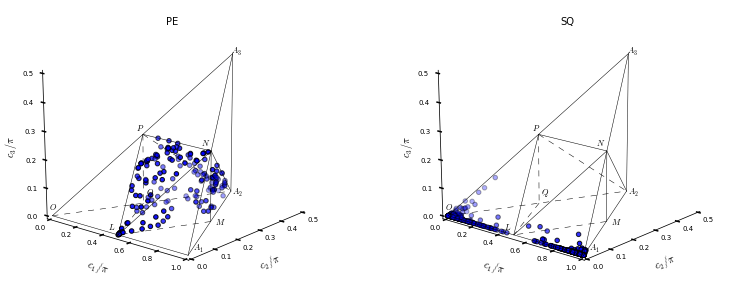

## T = 100 ns (RWA) ##

* Concurrence and Loss -- PE

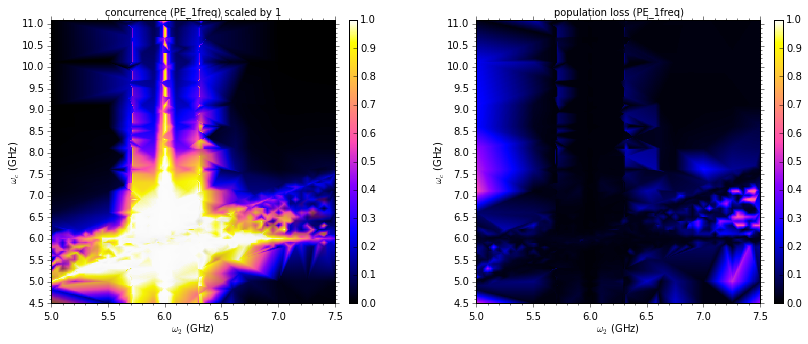

* Quality

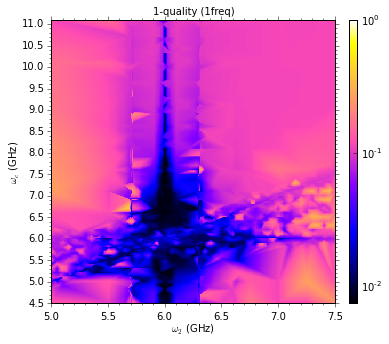

* Weyl Chamber

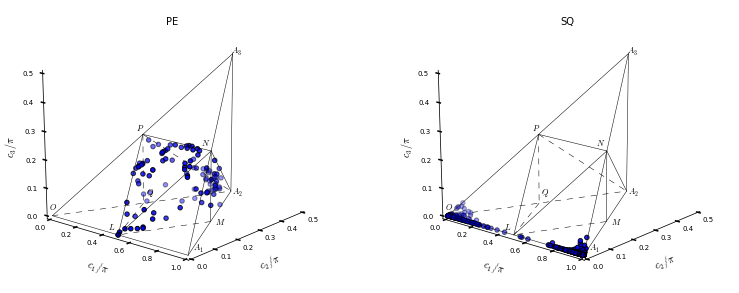

## T = 50 ns (RWA) ##

* Concurrence and Loss -- PE

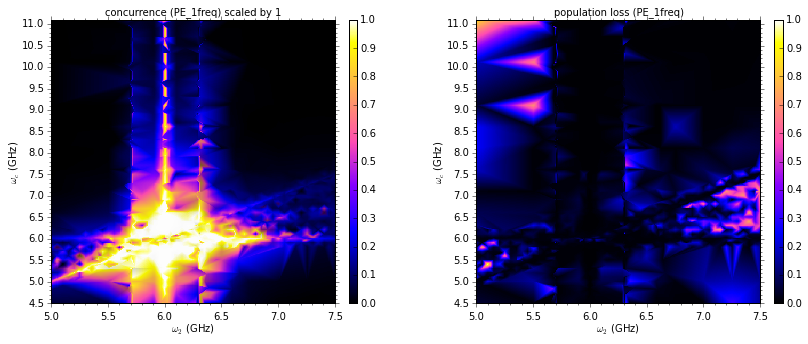

* Quality

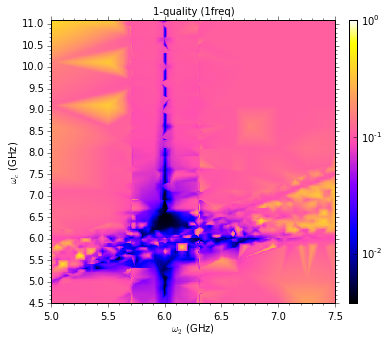

* Weyl Chamber

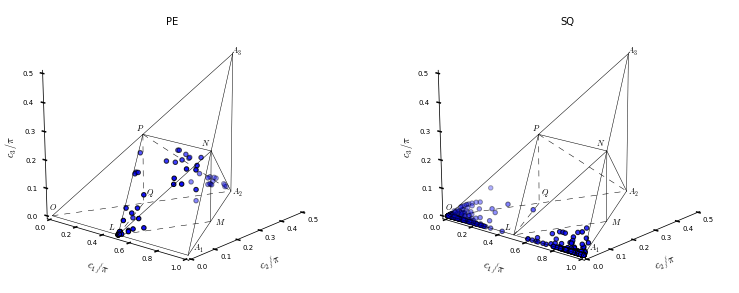

## T = 20 ns (RWA) ##

* Concurrence and Loss -- PE

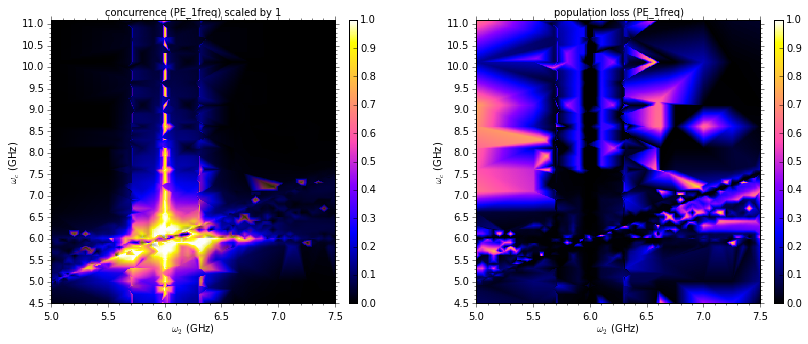

* Quality

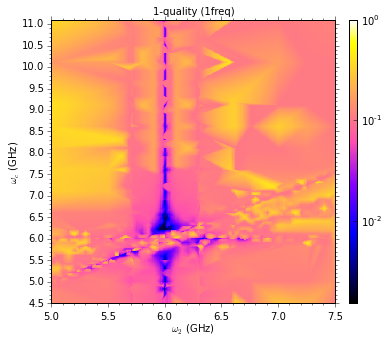

* Weyl Chamber

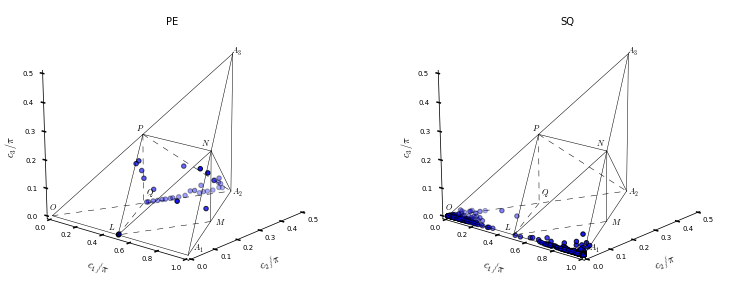

## T = 10 ns (RWA) ##

* Concurrence and Loss -- PE

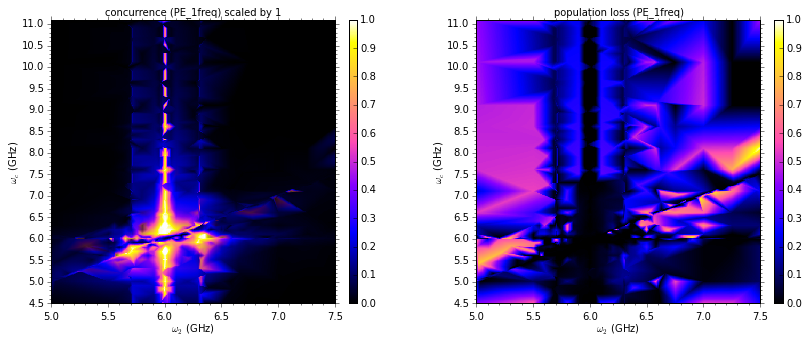

* Quality

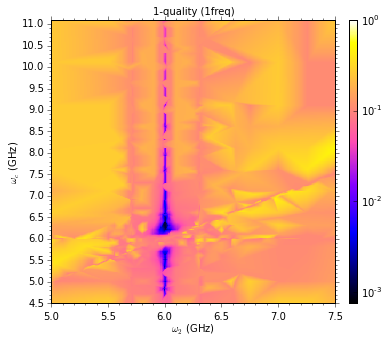

* Weyl Chamber

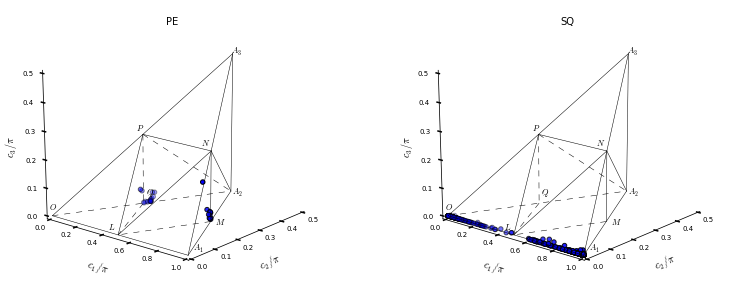

## T = 5 ns (RWA) ##

* Concurrence and Loss -- PE

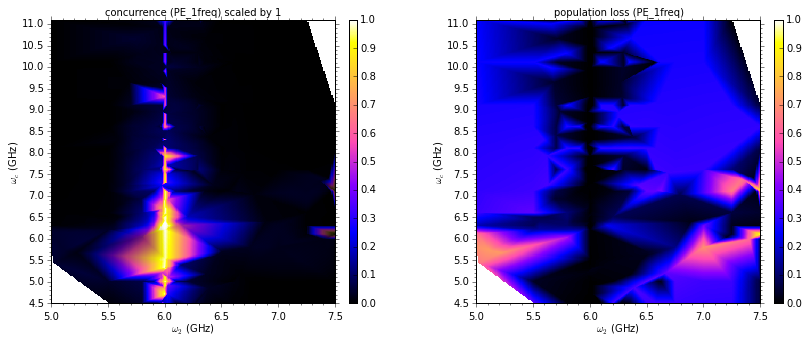

* Quality

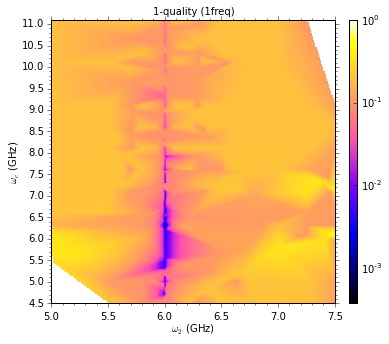

* Weyl Chamber

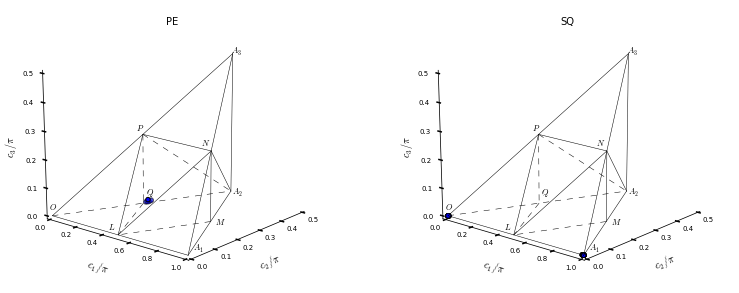

In [6]:
stage3_table = {}
for T in [200, 100, 50, 20, 10, 5]:
    stage3_table[T] = get_stage3_table('./runs_%0.3d_RWA'%T)
    write_quality_table(stage3_table[T], 'quality_%0.3d_RWA.dat'%T)
    oct_overview(T, 'stage3', inline=True, scatter_size=0,
                 categories=['1freq', ],
                 table_loader=get_stage3_table)

## Achieved Gate Fidelities

In [7]:
show_oct_summary_table(oct_table_reader=get_stage3_table, stage1_table_reader=get_stage1_table)

                    min f-free err  f-free err  PE error  Q error  w2 [GHz]  wc [GHz]
gate duration [ns]                                                                   
5                         3.77e-04    4.08e-04  1.54e-03 9.83e-04  6.00e+00  6.40e+00
10                        7.54e-04    7.56e-04  8.84e-04 8.22e-04  6.00e+00  8.30e+00
20                        1.51e-03    1.51e-03  1.56e-03 1.54e-03  6.00e+00  1.05e+01
50                        3.76e-03    3.76e-03  3.87e-03 3.82e-03  6.00e+00  1.11e+01
100                       7.51e-03    7.51e-03  7.59e-03 7.56e-03  6.00e+00  1.07e+01
200                       1.49e-02    1.49e-02  1.50e-02 1.50e-02  6.00e+00  1.07e+01


### PE Error in Liouville space

In [5]:
from select_for_prop import prepare_prop

In [6]:
from mgplottools.io import writetotxt
from QDYN.linalg import vectorize
from notebook_utils import get_Liouville_error

In [25]:
for T in [5, 10, 20, 50, 100, 200]:
    oct_folder = stage3_table[T][stage3_table[T]['target'] == 'PE']['F_avg'].idxmax()
    prop_folder = './liouville_prop/stage3/%03d' % T
    QDYN.shutil.mkdir(prop_folder)
    O = QDYN.gate2q.Gate2Q(join(oct_folder, 'U_closest_PE.dat'))
    writetotxt(join(oct_folder, 'target_gate.dat'), vectorize(O.real), vectorize(O.imag))
    prepare_prop(oct_folder, prop_folder, dry_run=False)
    ! rm {oct_folder}/target_gate.dat
    ! perl -p -i -e 's/gate = \w+/gate = target_gate.dat/' {prop_folder}/config

In [26]:
cluster_args = '--cluster-ini=cluster.ini --parallel=38 --jobs=1'

In [27]:
! ./run_prop.py {cluster_args} --rwa --rho --stage-folder=stage3 liouville_prop

In [7]:
for T in [5, 10, 20, 50, 100, 200]:
    prop_folder = './liouville_prop/stage3/%03d' % T
    print('%3d: %.2e' % (T, get_Liouville_error(join(prop_folder, 'prop.log'))))

  5: 1.10e-03
 10: 6.31e-04
 20: 1.21e-03
 50: 3.01e-03
100: 6.01e-03
200: 1.20e-02
